Compare resulting hydro coefficients from systematically varying qualities of the slant, such as cross section or slope.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

import pickle
import sys
import os
sys.path.append(os.path.relpath('../'))
from capytaine_generator import CapytaineSlantSolver

In [2]:
file1 = "data/cpt-slant-variations-1.pkl"
file2 = "data/cpt-slant-variations-2.pkl"

In [13]:
css = CapytaineSlantSolver(False, False, False, False, False)
def compute_cpt_slant(config):
  t_densities = [30, 60]
  respack = css.construct_and_solve(config["a"], config["d_in"], config["d_out"], config["heaving"], t_densities, 150, config["h"], config["m0"], config["rho"], 1)
  am, dp = (respack[0].added_mass)["Heave"], (respack[0].radiation_damping)["Heave"]
  return am, dp

def compute_cpt_box(config):
  t_densities = [30, 60]
  respack = css.construct_and_solve(config["a"], config["d_out"], config["d_out"], config["heaving"], t_densities, 150, config["h"], config["m0"], config["rho"], 1)
  am, dp = (respack[0].added_mass)["Heave"], (respack[0].radiation_damping)["Heave"]
  return am, dp

Vary slope but not cross section.

In [4]:
# Variable definitions
configurations = []

h = 15
a = [2, 4]
d_in = [6, 6]
d_out_init = [6]
m0 = 0.9
rho = 1023

for i in range(2, 11, 1):
  config = {"name" : "config-(" + str(i) + ")",
            "h" : h,
            "a" : a,
            "d_in" : d_in,
            "d_out" : d_out_init + [i],
            "heaving": [1, 1],
            "NMK" : [50, 50],
            "m0" : m0,
            "rho" : rho}
  configurations.append(config)


In [6]:
# originally generation cell, now data-loading cell

# for config in configurations:
#   am, dp = compute_cpt_slant(config)
#   config["AM"] = am
#   config["DP"] = dp

# with open(file1, "wb") as f:
#   pickle.dump(configurations, f)

with open(file1, "rb") as f:
  configurations = pickle.load(f)

In [9]:
# Define plotting functions
def plot_hydros(x, configurations, key, xlabel):
  hydros = []
  for config in configurations:
    hydros.append(config[key])

  plt.plot(x, hydros, color = "blue", linestyle = "-")

  if xlabel == "theta":
    ax = plt.gca()
    ax.xaxis.set_major_locator(MultipleLocator(np.pi / 8))
    ax.xaxis.set_major_formatter(FuncFormatter(format_func))

  # Labels and title
  plt.xlabel(xlabel)
  plt.ylabel(key)
  plt.grid(True)
  plt.tight_layout()

  # Show the plot
  plt.show()

def format_func(value, tick_position): # get x-axis theta values in pi - radians
    frac = 1 / 8
    multiple = round(value / (np.pi * frac))
    num = multiple
    denom = int(1 / frac)

    if multiple == 0:
        return "0"

    # Reduce the fraction
    common = np.gcd(abs(num), denom)
    num //= common
    denom //= common

    if denom == 1:
        coeff = f"{num}" if abs(num) != 1 else ("-" if num == -1 else "")
        return rf"${coeff}\pi$"
    else:
        coeff = "-" if num < 0 else ""
        num_string = "" if abs(num) == 1 else abs(num)
        return rf"${coeff}\frac{{{num_string}\pi}}{{{denom}}}$"

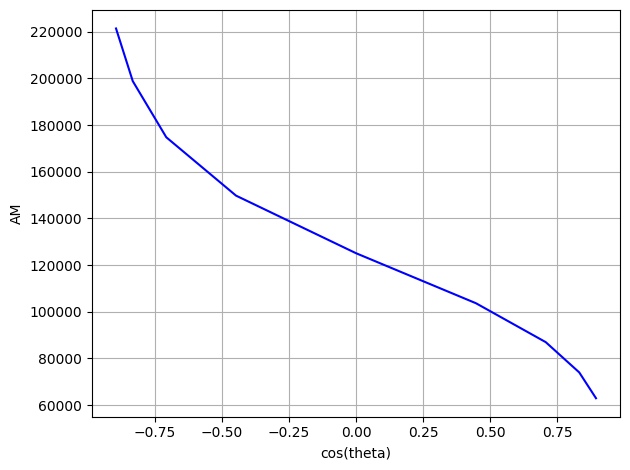

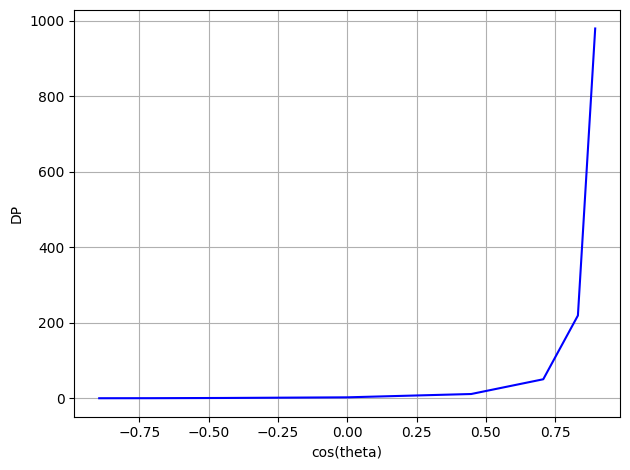

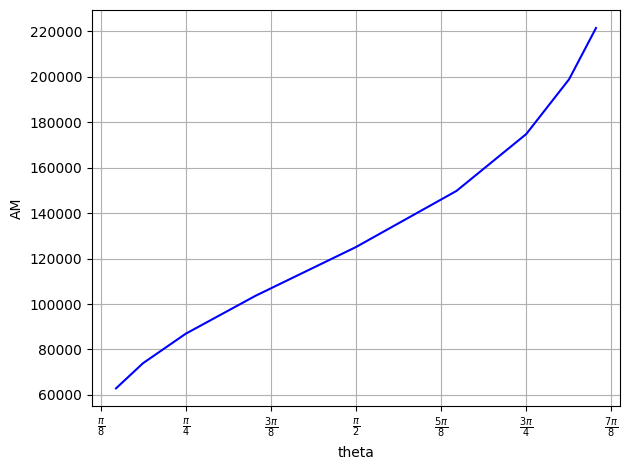

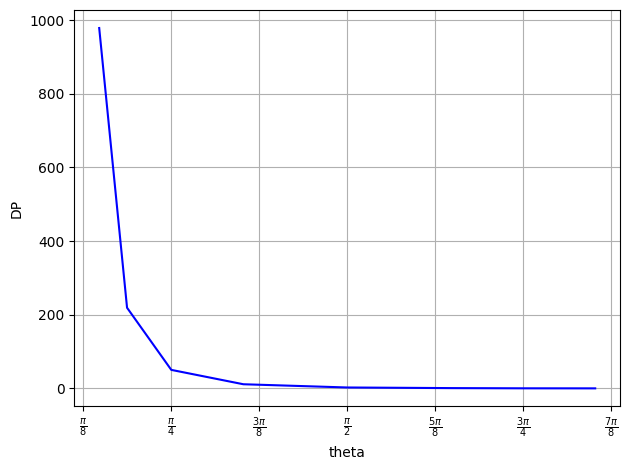

In [10]:
# Plots
cos_theta = []
theta = []
for config in configurations:
  delta_r = 2
  delta_z = 6 - (config["d_out"][1])
  ct = delta_z/(np.sqrt(delta_z ** 2 + delta_r ** 2))
  cos_theta.append(ct)
  theta.append(np.arccos(ct))

plot_hydros(cos_theta, configurations, "AM", "cos(theta)")
plot_hydros(cos_theta, configurations, "DP", "cos(theta)")
plot_hydros(theta, configurations, "AM", "theta")
plot_hydros(theta, configurations, "DP", "theta")


Vary cross section but not slope, and see how the values compare to the skeletal "box" version.

In [11]:
# Variable definitions
configurations = []

h = 15
a_init = [2]
d_in = [4, 4]
d_out_init = [4]
m0 = 0.9
rho = 1023

for i in range(6):
  config = {"name" : "config-(" + str(3+i) + ")",
            "h" : h,
            "a" : a_init + [3 + i],
            "d_in" : d_in,
            "d_out" : d_out_init + [3.5 - i * 0.5],
            "heaving": [1, 1],
            "NMK" : [50, 50],
            "m0" : m0,
            "rho" : rho}
  configurations.append(config)

In [14]:
# originally generation cell, now data-loading cell

# for config in configurations:
#   am, dp = compute_cpt_slant(config)
#   config["AM"] = am
#   config["DP"] = dp
#   am, dp = compute_cpt_box(config)
#   config["AM Boxed"] = am
#   config["DP Boxed"] = dp

# with open(file2, "wb") as f:
#   pickle.dump(configurations, f)

with open(file2, "rb") as f:
  configurations = pickle.load(f)

In [17]:
# Define plotting functions
def plot_hydros_with_boxed(x, configurations, key, xlabel):
  hydros = []
  hydros_boxed = []
  for config in configurations:
    hydros.append(config[key])
    hydros_boxed.append(config[key + " Boxed"])

  plt.plot(x, hydros_boxed, color = "black", linestyle = "--", label = "Boxed/skeletal version")
  plt.plot(x, hydros, color = "blue", linestyle = "-", label = "Actual configuration")

  # Labels and title
  plt.xlabel(xlabel)
  plt.ylabel(key)
  plt.legend()
  plt.grid(True)
  plt.tight_layout()

  # Show the plot
  plt.show()

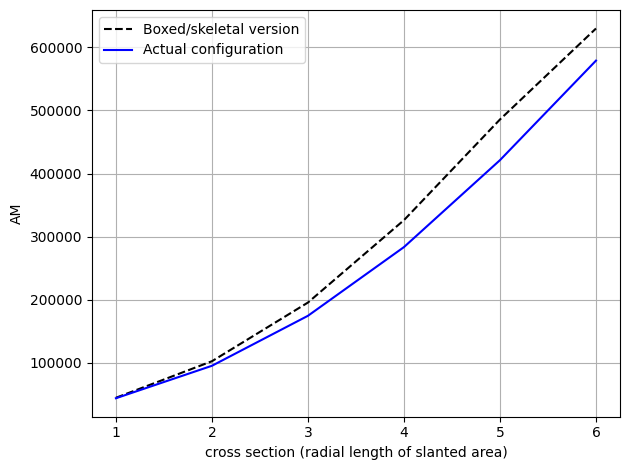

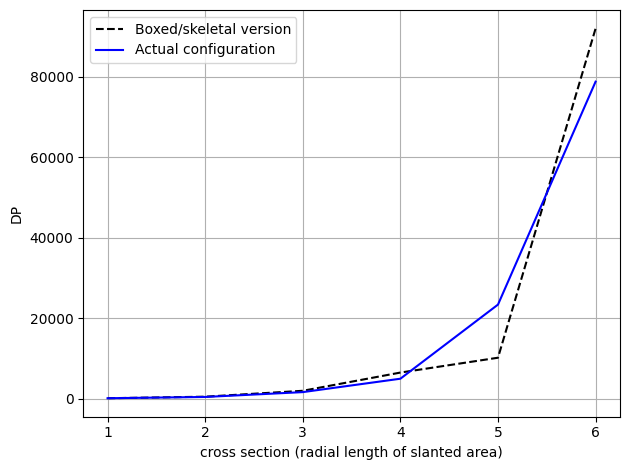

In [19]:
# Plots
delta_rs = []
for config in configurations:
  delta_r = config["a"][1] - config["a"][0]
  delta_rs.append(delta_r)

plot_hydros_with_boxed(delta_rs, configurations, "AM", "cross section (radial length of slanted area)")
plot_hydros_with_boxed(delta_rs, configurations, "DP", "cross section (radial length of slanted area)")